In [3]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [4]:
df = pd.read_csv("../train_dataset_scaled_robust_transformation.csv")
target = "smoking"

X = df.drop(columns=[target])
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
# OPTUNA OBJECTIVE FUNCTION
def objective(trial):
    C = trial.suggest_float("C", 1e-4, 1e2, log=True)
    loss = trial.suggest_categorical("loss", ["hinge", "squared_hinge"])
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    tol = trial.suggest_float("tol", 1e-5, 1e-2, log=True)

    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
    )

    model = LinearSVC(
        C=C,
        loss=loss,
        fit_intercept=fit_intercept,
        tol=tol,
        random_state=42
    )

    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)

    return accuracy_score(y_val, preds)

In [ ]:
# RUN OPTUNA
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("\nBest Score:", study.best_value)
print("Best Params:", study.best_params)

best = study.best_params

[I 2025-12-11 18:30:12,954] A new study created in memory with name: no-name-cbb0c1a3-961f-47b6-85cf-df91770a0f0c


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-12-11 18:30:13,125] Trial 0 finished with value: 0.7277310924369748 and parameters: {'C': 0.4824593058007488, 'loss': 'squared_hinge', 'fit_intercept': False, 'tol': 0.00013409452096450165}. Best is trial 0 with value: 0.7277310924369748.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:16,685] Trial 1 finished with value: 0.6373482726423902 and parameters: {'C': 97.52375313421464, 'loss': 'hinge', 'fit_intercept': False, 'tol': 1.397622464567828e-05}. Best is trial 0 with value: 0.7277310924369748.
[I 2025-12-11 18:30:16,835] Trial 2 finished with value: 0.7277310924369748 and parameters: {'C': 38.113639910416126, 'loss': 'squared_hinge', 'fit_intercept': False, 'tol': 0.00010391214191229592}. Best is trial 0 with value: 0.7277310924369748.
[I 2025-12-11 18:30:16,995] Trial 3 finished with value: 0.7277310924369748 and parameters: {'C': 0.7025139415807952, 'loss': 'squared_hinge', 'fit_intercept': False, 'tol': 0.002121181227693298}. Best is trial 0 with value: 0.7277310924369748.
[I 2025-12-11 18:30:17,143] Trial 4 finished with value: 0.7322128851540616 and parameters: {'C': 19.82222887340822, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.00015226904859428917}. Best is trial 4 with value: 0.7322128851540616.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:18,598] Trial 5 finished with value: 0.7262371615312792 and parameters: {'C': 11.577177731940894, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.00032390697513470405}. Best is trial 4 with value: 0.7322128851540616.
[I 2025-12-11 18:30:18,663] Trial 6 finished with value: 0.7335200746965452 and parameters: {'C': 0.004792076900517165, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.009266537640657891}. Best is trial 6 with value: 0.7335200746965452.
[I 2025-12-11 18:30:18,717] Trial 7 finished with value: 0.7335200746965452 and parameters: {'C': 0.0015727617571735465, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.005407341040949613}. Best is trial 6 with value: 0.7335200746965452.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:18,920] Trial 8 finished with value: 0.7249299719887955 and parameters: {'C': 0.7519891706214128, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.00024247180335774785}. Best is trial 6 with value: 0.7335200746965452.
[I 2025-12-11 18:30:18,993] Trial 9 finished with value: 0.7353874883286649 and parameters: {'C': 0.015902761233166265, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00025435708135501016}. Best is trial 9 with value: 0.7353874883286649.
[I 2025-12-11 18:30:19,045] Trial 10 finished with value: 0.7017740429505135 and parameters: {'C': 0.00010015606499655127, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0010483903746945254}. Best is trial 9 with value: 0.7353874883286649.
[I 2025-12-11 18:30:19,098] Trial 11 finished with value: 0.7353874883286649 and parameters: {'C': 0.009708581849606884, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.009605152509906196}. Best is trial 9 with value: 0.7353874883286649.
[I 2025-12-11 18:30:19,183] Trial 12 fin

d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:19,449] Trial 16 finished with value: 0.7352007469654529 and parameters: {'C': 0.07471204594007473, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0020878915478617023}. Best is trial 15 with value: 0.7359477124183007.
[I 2025-12-11 18:30:19,501] Trial 17 finished with value: 0.704201680672269 and parameters: {'C': 0.0001506733993042623, 'loss': 'hinge', 'fit_intercept': True, 'tol': 4.806962124307742e-05}. Best is trial 15 with value: 0.7359477124183007.
[I 2025-12-11 18:30:19,584] Trial 18 finished with value: 0.7353874883286649 and parameters: {'C': 0.18330310588344478, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0023753393477927653}. Best is trial 15 with value: 0.7359477124183007.
[I 2025-12-11 18:30:19,640] Trial 19 finished with value: 0.7323996265172735 and parameters: {'C': 0.001056157935922202, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0006366741218167209}. Best is trial 15 with value: 0.7359477124183007.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:20,385] Trial 20 finished with value: 0.7368814192343605 and parameters: {'C': 2.728300924515762, 'loss': 'hinge', 'fit_intercept': True, 'tol': 5.5988240334419e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:21,029] Trial 21 finished with value: 0.7344537815126051 and parameters: {'C': 2.294476078749404, 'loss': 'hinge', 'fit_intercept': True, 'tol': 5.917991026347524e-05}. Best is trial 20 with value: 0.7368814192343605.
[I 2025-12-11 18:30:21,081] Trial 22 finished with value: 0.7355742296918768 and parameters: {'C': 0.02563363235182057, 'loss': 'hinge', 'fit_intercept': True, 'tol': 1.4820704018042127e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:21,708] Trial 23 finished with value: 0.7357609710550888 and parameters: {'C': 3.954147045295465, 'loss': 'hinge', 'fit_intercept': True, 'tol': 1.0452161049790675e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:22,819] Trial 24 finished with value: 0.7355742296918768 and parameters: {'C': 3.7118522874808444, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.1467453463468767e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:23,860] Trial 25 finished with value: 0.7359477124183007 and parameters: {'C': 3.8223551968739993, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.87879327264719e-05}. Best is trial 20 with value: 0.7368814192343605.
[I 2025-12-11 18:30:23,971] Trial 26 finished with value: 0.7352007469654529 and parameters: {'C': 0.16195905687483583, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.362799742393649e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:24,405] Trial 27 finished with value: 0.734640522875817 and parameters: {'C': 1.368304522190086, 'loss': 'hinge', 'fit_intercept': True, 'tol': 7.406425285811935e-05}. Best is trial 20 with value: 0.7368814192343605.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:26,359] Trial 28 finished with value: 0.7380018674136322 and parameters: {'C': 10.318190519554138, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.2668644858121275e-05}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:26,471] Trial 29 finished with value: 0.7277310924369748 and parameters: {'C': 12.128402721972607, 'loss': 'squared_hinge', 'fit_intercept': False, 'tol': 0.00012089272930345018}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:26,612] Trial 30 finished with value: 0.7352007469654529 and parameters: {'C': 0.25869774002201706, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.004072555250533932}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:27,911] Trial 31 finished with value: 0.7365079365079366 and parameters: {'C': 7.271501494640348, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.7502895707336208e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:30,729] Trial 32 finished with value: 0.6395891690009337 and parameters: {'C': 96.12518432728903, 'loss': 'hinge', 'fit_intercept': True, 'tol': 3.5847882037921086e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:33,333] Trial 33 finished with value: 0.7277310924369748 and parameters: {'C': 44.17521267323348, 'loss': 'hinge', 'fit_intercept': True, 'tol': 1.7250655981798103e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:34,826] Trial 34 finished with value: 0.726984126984127 and parameters: {'C': 7.451031595304387, 'loss': 'hinge', 'fit_intercept': False, 'tol': 8.015224882220493e-05}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:34,955] Trial 35 finished with value: 0.7322128851540616 and parameters: {'C': 0.42038483784787073, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 1.0508853879881287e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:37,424] Trial 36 finished with value: 0.7223155929038282 and parameters: {'C': 42.154786419361834, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.00018128848892937256}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:37,525] Trial 37 finished with value: 0.7322128851540616 and parameters: {'C': 1.3083701151430325, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 9.142862426037776e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:39,402] Trial 38 finished with value: 0.7226890756302521 and parameters: {'C': 18.713333306308016, 'loss': 'hinge', 'fit_intercept': False, 'tol': 5.2474285626906065e-05}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:39,509] Trial 39 finished with value: 0.7322128851540616 and parameters: {'C': 7.981851212554732, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 2.901980511445504e-05}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:39,573] Trial 40 finished with value: 0.7352007469654529 and parameters: {'C': 0.038172934819607415, 'loss': 'hinge', 'fit_intercept': True, 'tol': 1.845233380770991e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:40,470] Trial 41 finished with value: 0.735014005602241 and parameters: {'C': 3.9522763997086447, 'loss': 'hinge', 'fit_intercept': True, 'tol': 2.8192597498199464e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:42,357] Trial 42 finished with value: 0.7366946778711485 and parameters: {'C': 20.07043727190832, 'loss': 'hinge', 'fit_intercept': True, 'tol': 4.64557182978747e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:43,929] Trial 43 finished with value: 0.7333333333333333 and parameters: {'C': 19.889856608433313, 'loss': 'hinge', 'fit_intercept': True, 'tol': 3.833868885249495e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:45,873] Trial 44 finished with value: 0.696171802054155 and parameters: {'C': 93.35642567663187, 'loss': 'hinge', 'fit_intercept': True, 'tol': 5.730135315438781e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:47,548] Trial 45 finished with value: 0.7370681605975724 and parameters: {'C': 28.65714586427237, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00035848541193188256}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:49,155] Trial 46 finished with value: 0.7221288515406162 and parameters: {'C': 27.91090342235959, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.00040897628888004637}. Best is trial 28 with value: 0.7380018674136322.
[I 2025-12-11 18:30:49,255] Trial 47 finished with value: 0.7322128851540616 and parameters: {'C': 50.57093547760463, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.00016658638723690116}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:50,223] Trial 48 finished with value: 0.7352007469654529 and parameters: {'C': 8.811973970261787, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00022109549181331366}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:51,486] Trial 49 finished with value: 0.7370681605975724 and parameters: {'C': 14.73454420358817, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00012047425487661341}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:52,756] Trial 50 finished with value: 0.734267040149393 and parameters: {'C': 15.646573001626273, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00012323425647170762}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:53,666] Trial 51 finished with value: 0.7338935574229691 and parameters: {'C': 7.073035047201502, 'loss': 'hinge', 'fit_intercept': True, 'tol': 6.887218018739361e-05}. Best is trial 28 with value: 0.7380018674136322.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:55,679] Trial 52 finished with value: 0.7404295051353875 and parameters: {'C': 27.812169055858657, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00032778867174228026}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:30:57,791] Trial 53 finished with value: 0.7352007469654529 and parameters: {'C': 25.559246142983117, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0003521845655071014}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:00,193] Trial 54 finished with value: 0.7217553688141923 and parameters: {'C': 74.17990241995366, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0010684031411865458}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:00,557] Trial 55 finished with value: 0.7365079365079366 and parameters: {'C': 1.8005843530364016, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0005162066870111723}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:00,766] Trial 56 finished with value: 0.7352007469654529 and parameters: {'C': 0.7410497325888198, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0002541888977972577}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:02,603] Trial 57 finished with value: 0.7344537815126051 and parameters: {'C': 32.17721359779668, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00010230032023329806}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:03,785] Trial 58 finished with value: 0.7366946778711485 and parameters: {'C': 11.819224409351042, 'loss': 'hinge', 'fit_intercept': True, 'tol': 4.290101177367923e-05}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:04,268] Trial 59 finished with value: 0.7368814192343605 and parameters: {'C': 2.8187025616031023, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0007532054491988026}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:04,726] Trial 60 finished with value: 0.7262371615312792 and parameters: {'C': 2.4567204811258816, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.0008356159626006845}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:06,742] Trial 61 finished with value: 0.7301587301587301 and parameters: {'C': 60.85912533264289, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0003240903336216408}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:08,066] Trial 62 finished with value: 0.7337068160597572 and parameters: {'C': 14.850982312801506, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00047400959374685714}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:09,697] Trial 63 finished with value: 0.7337068160597572 and parameters: {'C': 22.457230489877563, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0014859087110545928}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:09,956] Trial 64 finished with value: 0.734640522875817 and parameters: {'C': 1.2392078120060124, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0007447144082758286}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:10,778] Trial 65 finished with value: 0.7357609710550888 and parameters: {'C': 4.510123029555269, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00020307383932456667}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:11,546] Trial 66 finished with value: 0.7374416433239963 and parameters: {'C': 5.929758248927589, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00013319528518209277}. Best is trial 52 with value: 0.7404295051353875.
[I 2025-12-11 18:31:11,627] Trial 67 finished with value: 0.7323996265172735 and parameters: {'C': 2.7208929592150635, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.000298002550112444}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:12,540] Trial 68 finished with value: 0.7370681605975724 and parameters: {'C': 5.750001556261452, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0001528449956078709}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:13,381] Trial 69 finished with value: 0.7368814192343605 and parameters: {'C': 4.73246824495635, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00014153897004037696}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:14,196] Trial 70 finished with value: 0.7363211951447246 and parameters: {'C': 5.917461223695639, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00015220291608744913}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:15,319] Trial 71 finished with value: 0.7368814192343605 and parameters: {'C': 10.502150498613304, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0001173851307415759}. Best is trial 52 with value: 0.7404295051353875.
[I 2025-12-11 18:31:15,454] Trial 72 finished with value: 0.7353874883286649 and parameters: {'C': 0.4580331984773426, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0006670554726320762}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:17,467] Trial 73 finished with value: 0.7273576097105509 and parameters: {'C': 34.583075151346804, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0002689737644847056}. Best is trial 52 with value: 0.7404295051353875.
[I 2025-12-11 18:31:17,530] Trial 74 finished with value: 0.7359477124183007 and parameters: {'C': 0.004222166736967681, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0004065144075127294}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:17,764] Trial 75 finished with value: 0.7359477124183007 and parameters: {'C': 0.9101362267878277, 'loss': 'hinge', 'fit_intercept': True, 'tol': 8.904310036090095e-05}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:18,280] Trial 76 finished with value: 0.7359477124183007 and parameters: {'C': 2.1961221199938183, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00019217865175565188}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:19,585] Trial 77 finished with value: 0.7247432306255835 and parameters: {'C': 11.848227284799961, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.001211013531381893}. Best is trial 52 with value: 0.7404295051353875.
[I 2025-12-11 18:31:19,663] Trial 78 finished with value: 0.7323996265172735 and parameters: {'C': 4.845815408265507, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.0005905818182686871}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:20,135] Trial 79 finished with value: 0.7376283846872083 and parameters: {'C': 3.3571579827676494, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0003911811364052405}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:21,589] Trial 80 finished with value: 0.7337068160597572 and parameters: {'C': 14.295997939750535, 'loss': 'hinge', 'fit_intercept': True, 'tol': 7.045069333145622e-05}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:22,117] Trial 81 finished with value: 0.7361344537815127 and parameters: {'C': 3.4646653341891236, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00041459577453929644}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:22,988] Trial 82 finished with value: 0.7361344537815127 and parameters: {'C': 6.273534864824049, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0002242506780083203}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:23,340] Trial 83 finished with value: 0.7352007469654529 and parameters: {'C': 1.8059860215687062, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00035994626885538504}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:24,349] Trial 84 finished with value: 0.7357609710550888 and parameters: {'C': 9.672952143995808, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00028388023332287987}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:24,875] Trial 85 finished with value: 0.7355742296918768 and parameters: {'C': 3.297586012669353, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00016819743026816984}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:25,100] Trial 86 finished with value: 0.7357609710550888 and parameters: {'C': 1.0949131307010138, 'loss': 'hinge', 'fit_intercept': True, 'tol': 1.2270208346773947e-05}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:26,912] Trial 87 finished with value: 0.734640522875817 and parameters: {'C': 52.20805834311751, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00010059617564120148}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:28,543] Trial 88 finished with value: 0.7376283846872083 and parameters: {'C': 30.448042025625114, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00046736426891485057}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:30,182] Trial 89 finished with value: 0.7251167133520074 and parameters: {'C': 38.33209936194314, 'loss': 'hinge', 'fit_intercept': False, 'tol': 0.0001389891059856238}. Best is trial 52 with value: 0.7404295051353875.
[I 2025-12-11 18:31:30,279] Trial 90 finished with value: 0.7323996265172735 and parameters: {'C': 27.96064012409619, 'loss': 'squared_hinge', 'fit_intercept': True, 'tol': 0.00044970612048078845}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:31,472] Trial 91 finished with value: 0.7378151260504202 and parameters: {'C': 15.378313461940557, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00035919553777513007}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:32,820] Trial 92 finished with value: 0.7355742296918768 and parameters: {'C': 18.547241896991075, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00057036697176253}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:35,118] Trial 93 finished with value: 0.7318394024276377 and parameters: {'C': 64.08235440754646, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0003476726659157168}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:36,081] Trial 94 finished with value: 0.7363211951447246 and parameters: {'C': 9.266748333545218, 'loss': 'hinge', 'fit_intercept': True, 'tol': 3.342843776037163e-05}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:36,823] Trial 95 finished with value: 0.7361344537815127 and parameters: {'C': 6.28643531338106, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0004955537401736811}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:38,117] Trial 96 finished with value: 0.7372549019607844 and parameters: {'C': 16.805891131961314, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0002341096688553709}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:39,650] Trial 97 finished with value: 0.7370681605975724 and parameters: {'C': 23.236983843187602, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00023753321038781937}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:40,963] Trial 98 finished with value: 0.7365079365079366 and parameters: {'C': 16.444061839708255, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.0002060221966638046}. Best is trial 52 with value: 0.7404295051353875.


d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[I 2025-12-11 18:31:42,842] Trial 99 finished with value: 0.7170868347338936 and parameters: {'C': 78.25149069791122, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00029445191423493037}. Best is trial 52 with value: 0.7404295051353875.

Best Score: 0.7404295051353875
Best Params: {'C': 27.812169055858657, 'loss': 'hinge', 'fit_intercept': True, 'tol': 0.00032778867174228026}


In [ ]:
# TRAIN FINAL MODEL
final_model = LinearSVC(
    C=best["C"],
    loss=best["loss"],
    fit_intercept=best["fit_intercept"],
    tol=best["tol"],
    random_state=42
)

final_model.fit(X_train, y_train)

d:\IIITB\Sem1\ML\Project part2\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.00032778867174228026
,C,27.812169055858657
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [ ]:
y_pred = final_model.predict(X_test)

print("\n=========== FINAL TEST RESULTS ===========")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Macro:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=========== FINAL TEST RESULTS ===========
Accuracy: 0.7349865551239916
F1 Macro: 0.7152581638188541

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      4242
           1       0.64      0.64      0.64      2452

    accuracy                           0.73      6694
   macro avg       0.71      0.72      0.72      6694
weighted avg       0.74      0.73      0.74      6694



In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

<Figure size 1000x800 with 0 Axes>

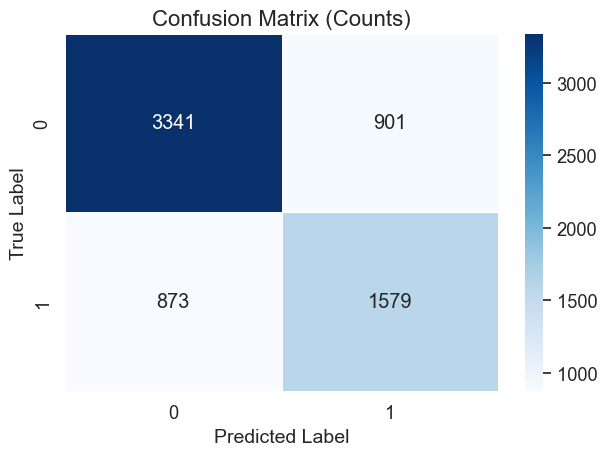

In [ ]:
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5,
    linecolor="white",
    cbar=True
)

plt.title("Confusion Matrix (Counts)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()